# Neural Networks Library

My idea of programming a library for Neural Networks started in 2021. I've began watching a lot of Youtube-Turorials about Machine Learning and programming in general. My experience since then had been Arduino, HTML/CSS/JS, LEGO-Mindstorms and Scratch, so to say the obvious, i was a bloody beginner.

## First Try Outs

In 2021 I got a Laptop from school because we had homeschooling and I started programming on it. I downloaded Python, Arduino and started first designing my first networks in Google-Colab (with tensorflow). Soon I also found a good tutorial to make my own Neural Networks (sentdex) and till then I had already a pretty good understanding of the logic behind a Neural Network, so all that was left was to be able to program it. I had multiple runs where I started this project again. Every time I ended up on a new problem, where often my understanding and motivation was done, but I always got on step further.

## This Project

This year 2022/23 I decided again to build a new version, that finally could optimize a Network efficiently. The first part of the year I took long time to build my mindset and decide what to focus on. In november I started my changing my daily mindset bit by bit, till in december I got to the decision to make less excuses and let what I had prepared in my head outside in my life. I changed my daily routine drastically and tried to stop instant gratification so I can build powerful habits.
Now in January, school has got back to regularity and my routine took a lot of will power but is still standing. For not falling in a routine where I don't continously conciously improve, I decided it's time to continue on this journey and start a new Neural Network project! 

In [93]:
import numpy as np
import nnfs
import matplotlib.pyplot as plt
from library import *
from nnfs.datasets import spiral_data, vertical_data
nnfs.init()

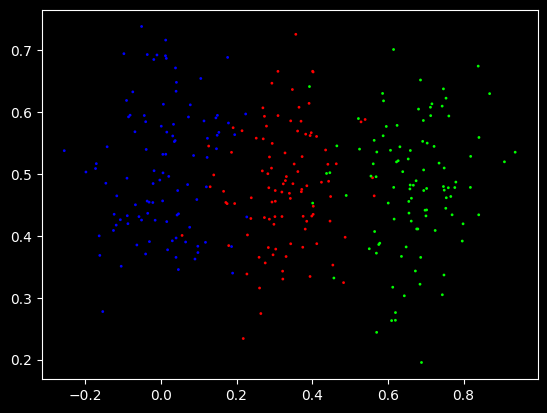

In [94]:
X, y = vertical_data(samples = 100, classes = 3)
plt.style.use('dark_background')
plt.scatter(X[:,0], X[:,1], c=y, s=1, cmap="brg")
plt.show()

In [95]:
def predict(NN, name = "Neural Network", intensity = 130, area:list[tuple[int]] = [(np.amin(X[:,0])-0.05,np.amax(X[:,0])+0.05),(np.amin(X[:,1])-0.05,np.amax(X[:,1])+0.05)]):
    plt.title(name)
    plt.style.use('dark_background')
    x1, x2 = area[0]
    y1,y2 = area[1]
    predX = []
    n=intensity
    for i in range (int(n * (x2-x1))):
        for j in range (int(n * (y2-y1))):
            predX.append(np.array([i/n+x1,j/n+y1]))
    predX = np.array(predX)

    output = NN(predX)
    plt.scatter(predX[:,0], predX[:,1], c=output, s=80, cmap="brg", alpha=0.03)
    X, y = vertical_data(samples = 200, classes = 3)
    plt.scatter(X[:,0], X[:,1], c=y, s=1, cmap="brg")
    plt.show()

In [96]:
myNN = Network(Softmax_and_CategoricalCrossEntropy(), SGD())
myNN.addLayer(Layer_Dense(2, 64, ReLU()))
myNN.addLayer(Layer_Dense(64, 64, ReLU()))
myNN.addLayer(Layer_Dense(64, 3, None))

print(myNN.run(np.array([3,1])))
print("Loss:\t"+ str(myNN.calcLoss(y)))
print("Accuracy:\t"+ str(myNN.calcAccuracy(y)))

[[1.6497087e-04 1.1170932e-04 4.0800605e-06]]
Loss:	1.0986123
Accuracy:	0.3333333333333333


In [97]:
X, y = vertical_data(samples = 100, classes = 3)


Loss:	1.0986139


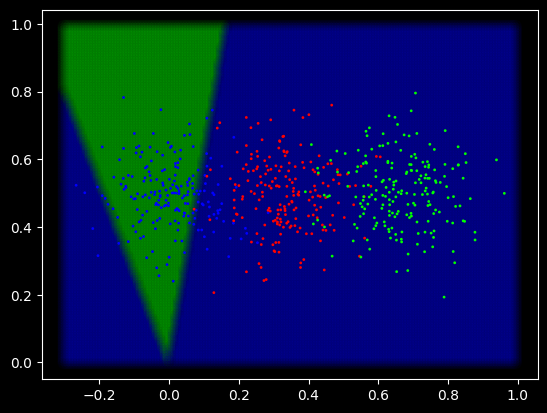

In [98]:
output = myNN(X)
print("Loss:\t"+str(myNN.calcLoss(y)))
predict(myNN,130, area = [(-0.3,1),(0,1)])

epoche: 0, acc: 0.333, loss: 1.099
epoche: 1000, acc: 0.940, loss: 0.618
epoche: 2000, acc: 0.947, loss: 0.624
epoche: 3000, acc: 0.943, loss: 0.613
epoche: 4000, acc: 0.950, loss: 0.611
epoche: 5000, acc: 0.950, loss: 0.615
ACC:	0.95
Loss:	0.615


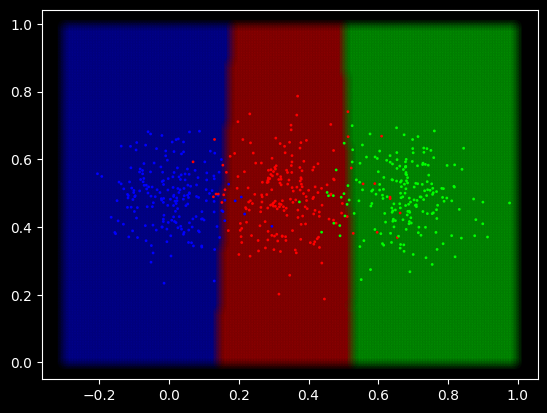

In [99]:
myNN.run(X)
myNN.optimize(X,y,5001, 1000,1)
myNN.run(X)
print("ACC:\t"+str(myNN.calcAccuracy(y)))
print(f"Loss:\t{myNN.calcLoss(y):.3f}")

predict(myNN,130, area = [(-0.3,1),(0,1)])


New optimal found: 	0.5474338
New optimal found: 	0.53966033
New optimal found: 	0.51447207
New optimal found: 	0.49343812
New optimal found: 	0.38783914
New optimal found: 	0.24926214
New optimal found: 	0.18803288
New optimal found: 	0.15547244
New optimal found: 	0.13700154
ACC:	0.9433333333333334
0.13700154


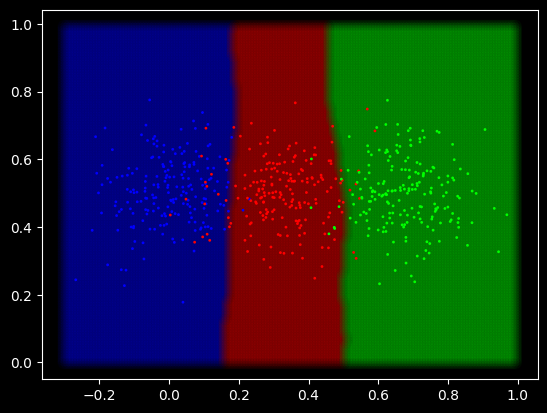

In [100]:
myNN.optimizeRandomly(1000, 0.2, X, y)
output = myNN(X)
print("ACC:\t"+str(myNN.calcAccuracy(y)))
print(myNN.calcLoss(y))

predict(myNN,130, area = [(-0.3,1),(0,1)])